In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [8]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
df=pd.read_csv(boston_url)

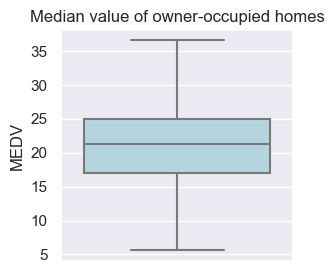

In [9]:
#For the "Median value of owner-occupied homes" provide a boxplot

sns.set_style("darkgrid")
sns.set_theme(rc={'figure.figsize':(3,3)})
fig1 = sns.boxplot(y=df["MEDV"], data=df, showfliers= False,color="lightblue").set(title='Median value of owner-occupied homes')

C:\Users\Basse\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


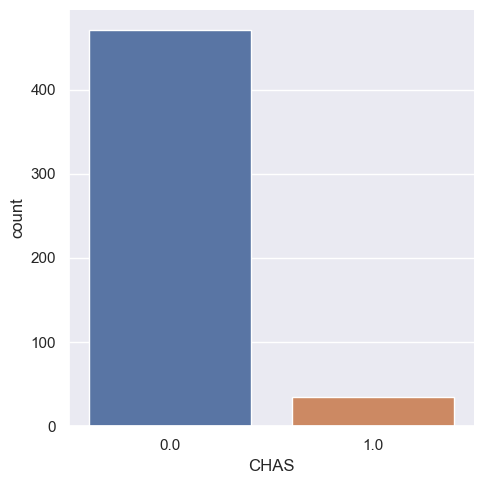

In [17]:
#Provide a bar plot for the Charles river variable

fig= sns.catplot(x='CHAS', kind='count', data=df)


In [18]:
#Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

# We are looking wether there is  a significant difference, between two independent samples, 
# so we will be using the two tailed t test for independent samples, but first we will have to run the Leven's test for variance equality:

#H0: the two variances are equal var0=var1
#H1: the two variances are not equal var0 != var1

#I filter the data to get our two variables that will rappresent our samples of interest
dfchar= df[df["CHAS"]==1]["MEDV"]
dfnchar=df[df["CHAS"]==0]["MEDV"]

lv= stats.levene(dfchar, dfnchar, center= "mean")

if lv[1] < 0.05:
    print(f"Levene's test p-Value is:{lv[1]} ; it is less than 0.05 so we reject the H0 and the variances are not equal")
else:
    print(f"Levene's test p-Value is:{lv[1]} ; it is greater than 0.05 so we fail to reject the H0 and the variances are equal")


Levene's test p-Value is:0.003238119367639829 ; it is less than 0.05 so we reject the H0 and the variances are not equal


In [19]:
#Our hypothesis for the t test: 

#H0: the two means are equal mean0=mean1
#H1: the two means are not equal mean1 != mean0

#we set the parameter of the variances to FALSE because they are not equal 
tv=stats.ttest_ind(dfchar, dfnchar, equal_var="False")

if tv[1] < 0.05:
    print(f"T-test p-Value is:{tv[1]} ; it is less than 0.05 so we reject the H0 , and there is a significant difference between the two samples ")
else:
    print(f"T-test p-Value is:{tv[1]} ; it is more than 0.05 so wefail to reject the H0 , and there is no significant difference between the two samples")


T-test p-Value is:7.390623170519905e-05 ; it is less than 0.05 so we reject the H0 , and there is a significant difference between the two samples 


Text(0.5, 1.0, 'Proportion of owner-occupied units \nmore than 70')

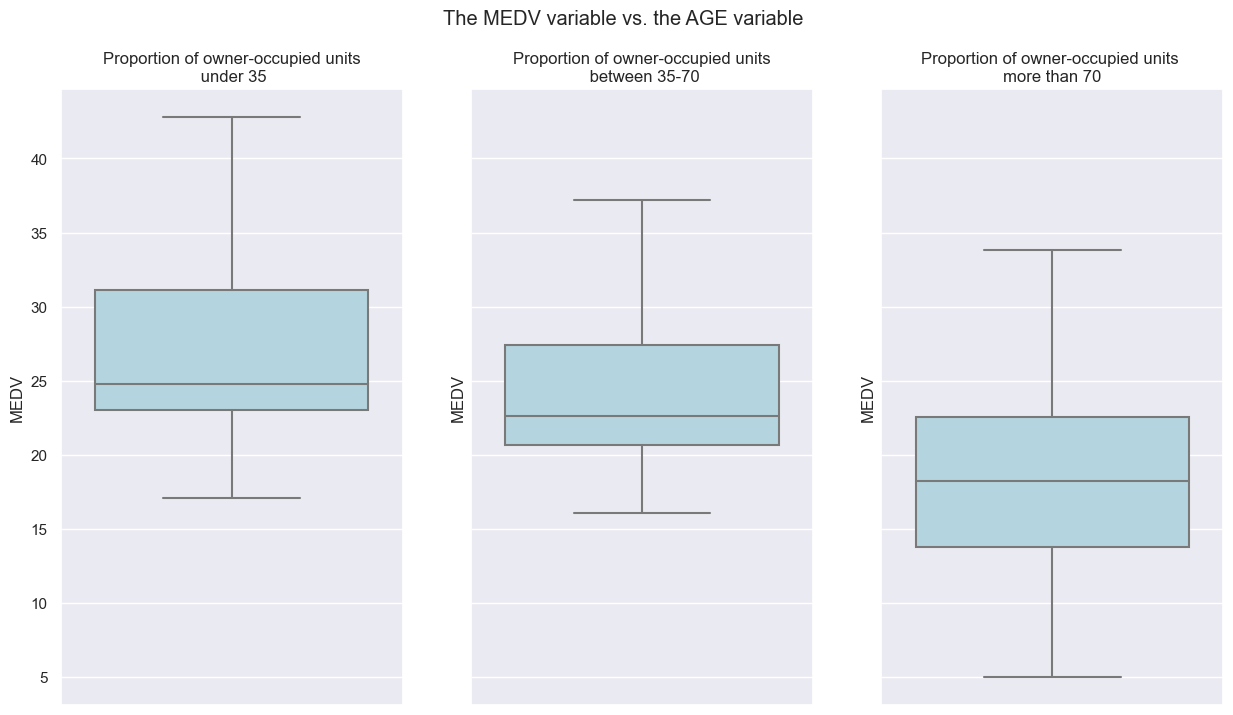

In [20]:
# I divided the dataset into the three groups of AGE provided 

under35= df[df["AGE"]<= 35]
mid= df[(df["AGE"]> 35)&(df["AGE"]<= 70)]
more70= df[df["AGE"]> 70]


fig, axes = plt.subplots(1, 3, sharex=True, figsize=(15,8), sharey= True)
fig.suptitle('The MEDV variable vs. the AGE variable')

fig = sns.boxplot(y=df[df["AGE"]<= 35]["MEDV"], data=df ,showmeans=False, showfliers=False, color="lightblue", ax=axes[0])
axes[0].set_title("Proportion of owner-occupied units\n under 35")

fig = sns.boxplot(y=df[(df["AGE"]> 35)&(df["AGE"]<= 70)]["MEDV"], data=df ,showmeans=False, showfliers=False, color="lightblue",ax=axes[1])
axes[1].set_title("Proportion of owner-occupied units\n between 35-70")

fig = sns.boxplot(y=df[df["AGE"]> 70].MEDV, data=df ,showmeans=False, showfliers=False, color="lightblue",ax=axes[2])
axes[2].set_title("Proportion of owner-occupied units \nmore than 70")

In [21]:
#Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

# to compare more than one sample we have to use the analysis of variances ANOVA 
#H0: the three means are equal 
#H1: at least one mean is not equal to the others 

#Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

under351= df[df["AGE"]<= 35]["MEDV"]
mid1= df[(df["AGE"]> 35)&(df["AGE"]<= 70)]["MEDV"]
more701= df[df["AGE"]> 70]["MEDV"]

anova1=stats.f_oneway(under351, mid1, more701)

if anova1[1] < 0.05:
    print(f"ANOVA-test p-Value is:{anova1[1]} ; it is less than 0.05 so we reject the H0 , at least one of the samples is different")
else:
    print(f"ANOVA-test p-Value is:{anova1[1]} ; it is more than 0.05 so wefail to reject the H0 , the means for all three samples are equal")

# the means of the three groups are not equal

ANOVA-test p-Value is:1.7105011022702984e-15 ; it is less than 0.05 so we reject the H0 , at least one of the samples is different


Text(0.5, 1.0, 'The relationship between "Nitric oxide concentrations (NOX)" \nand "The proportion of non-retail business acres per town (INDUS)"')

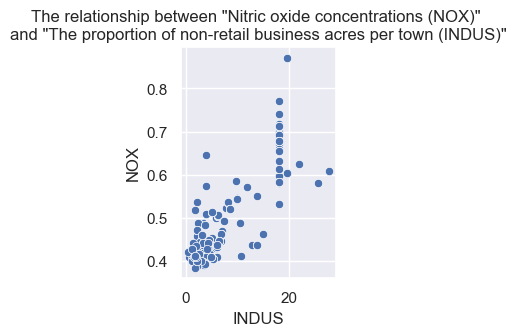

In [29]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.
# What can you say about the relationship?

fig = sns.scatterplot(x='INDUS', y='NOX', data=df)
figsize=(15,10)
fig.set_title("The relationship between \"Nitric oxide concentrations (NOX)\" \nand \"The proportion of non-retail business acres per town (INDUS)\"")

In [30]:
#Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
# to test the correlation between two continuous variables we use the pearson coeffecient 

#H0: there is no association between the two variables 
#H1: There is an association between the two variables 

pear= stats.pearsonr(df["INDUS"], df["NOX"])

if pear[1] < 0.05:
    print(f"Pearson-test p-Value is:{pear[1]} ; it is less than 0.05 so we reject the H0 , there is a correlation between the variables")
else:
    print(f"Pearson-test p-Value is:{pear[1]} ; it is more than 0.05 so wefail to reject the H0 , there is no a correlation between the variables")

print(f"Pearson Coefficient (r) is:{pear[0]}")

Pearson-test p-Value is:7.913361061242812e-98 ; it is less than 0.05 so we reject the H0 , there is a correlation between the variables
Pearson Coefficient (r) is:0.7636514469209149


<Axes: xlabel='PTRATIO', ylabel='Count'>

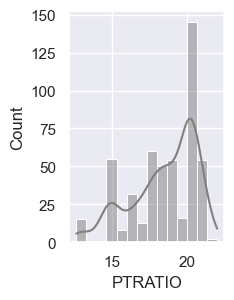

In [31]:
#Create a histogram for the pupil to teacher ratio variable

sns.histplot(df["PTRATIO"], color='gray', kde=True,)

In [32]:
#What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

#We use the regression model to detect how the independent variable X will impact the independent variable y 

#H0: b1= 0 so there is no impact of X on y 
#H1: b1!= 0 variable X has an impact on variable y 

X = df["DIS"]
y= df["MEDV"]

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

predictions = model.predict(X)

model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 20 Mar 2024   Prob (F-statistic):           1.21e-08
Time:                        20:00:38   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""